<a href="https://colab.research.google.com/github/Anisha-Tasneem/CSE499/blob/main/Random_Forest_with_main_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/CSE499/OurData.csv')
print(train.shape)

(5000, 11)


In [ ]:
data.head(5)

,Order ID,Customer Name,Gender,City,Address,Product Details (Brand),Product Price (Taka),Delivery Charge(Taka),Total Bill (Taka),Phone Number,Customer Value
0,1,Fatima Aisha,Female,Chittagong,"B4; Lavinia, 30 mehedibag,Chittagong",Faraz Manan,90000,120,90120,018-225-41900,High
1,2,Nafisa Tasneem,Female,Sylhet,"Azadi111 mirboxtulla,Sylhet",Khaadi,5990,120,6110,019-518-69097,High
2,3,Parvin Sultana Popy,Female,Gazipur,"Ershadnogor,Tongi,Gazipur",Mushq,6890,120,7010,018-599-88102,Low
3,4,Mimi Jahan,Female,Gazipur,"House #12, Road #2, Gazipur Sadar, Gazipur",Sana Safinaz,10590,120,10710,017-505-79104,Low
4,5,Suchi Islam,Female,Kushtia,"Plot #6, Kumarkhali, Kushtia",Maria B.,7500,120,7620,013-834-21041,High


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

data = pd.read_csv('/content/drive/MyDrive/CSE499/OurData.csv')

# Defining categorical and numerical columns
categorical_cols = ['Gender', 'City', 'Product Details (Brand)', 'Phone Number']
numerical_cols = ['Product Price (Taka)', 'Delivery Charge(Taka)', 'Total Bill (Taka)']

# Droping columns that are not used for modeling
data.drop(['Order ID', 'Customer Name', 'Address'], axis=1, inplace=True)

# Handling missing values
# For numerical columns, imputing missing values with the mean
# For categorical columns, impute missing values with a constant ('missing')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_cols),
        ('cat', SimpleImputer(strategy='constant', fill_value='missing'), categorical_cols)
    ])

processed_data = preprocessor.fit_transform(data)

# Converting processed data back to DataFrame
processed_df = pd.DataFrame(processed_data, columns=numerical_cols + categorical_cols)

# Handling categorical encoding
processed_df = pd.get_dummies(processed_df, columns=categorical_cols)

# Standardizing numerical features
scaler = StandardScaler()
processed_df[numerical_cols] = scaler.fit_transform(processed_df[numerical_cols])


In [ ]:
print(processed_df.head(5000))

      Product Price (Taka)  Delivery Charge(Taka)  Total Bill (Taka)  \
0                 3.024610               0.731865           3.025340   
1                -0.390827               0.731865          -0.390121   
2                -0.354238               0.731865          -0.353531   
3                -0.203814               0.731865          -0.203106   
4                -0.329438               0.731865          -0.328731   
...                    ...                    ...                ...   
4995             -0.203814               0.731865          -0.203106   
4996              3.024610               0.731865           3.025340   
4997             -0.246095              -1.366372          -0.247421   
4998             -0.390827              -1.366372          -0.392154   
4999             -0.203814               0.731865          -0.203106   

      Gender_Female  Gender_Male  City_Barisal  City_Bogura  City_Chittagong  \
0                 1            0             0         

In [ ]:
processed_df.head(5)

,Product Price (Taka),Delivery Charge(Taka),Total Bill (Taka),Gender_Female,Gender_Male,City_Barisal,City_Bogura,City_Chittagong,City_Comilla,City_Cox's Bazar,...,Phone Number_019-858-63309,Phone Number_019-860-96706,Phone Number_019-861-61096,Phone Number_019-873-99704,Phone Number_019-876-51041,Phone Number_019-891-48601,Phone Number_019-898-14034,Phone Number_019-928-80422,Phone Number_019-935-70866,Phone Number_019-994-35106
0,3.024610,0.731865,3.025340,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.390827,0.731865,-0.390121,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.354238,0.731865,-0.353531,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.203814,0.731865,-0.203106,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.329438,0.731865,-0.328731,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import numpy as np

In [ ]:
print(data.dtypes)

Gender                     object
City                       object
Product Details (Brand)    object
Product Price (Taka)        int64
Delivery Charge(Taka)       int64
Total Bill (Taka)           int64
Phone Number               object
Customer Value             object
dtype: object


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

# Extracting the categorical columns
categorical_cols = ['Gender', 'City']

# One-hot encode categorical variables
encoder = OneHotEncoder(drop="first", sparse=False)
X_encoded = encoder.fit_transform(data[categorical_cols])

# Dropping columns not suitable for modeling
data_processed = data.drop(columns=['Gender', 'City', 'Product Details (Brand)', 'Phone Number'])

#label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data_processed['Customer Value'])

#Droping original 'Customer Value' column from the processed data
data_processed.drop(columns=['Customer Value'], inplace=True)

#Concatenating encoded categorical variables with remaining numerical variables
X = np.concatenate((data_processed.values, X_encoded), axis=1)
y = y_encoded

#Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Initialize the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

#Training random forest model
rf_classifier.fit(X_train, y_train)

#Predicting on the test set
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 0.672


In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.36      0.08      0.13       310
           1       0.69      0.94      0.80       690

    accuracy                           0.67      1000
   macro avg       0.53      0.51      0.46      1000
weighted avg       0.59      0.67      0.59      1000



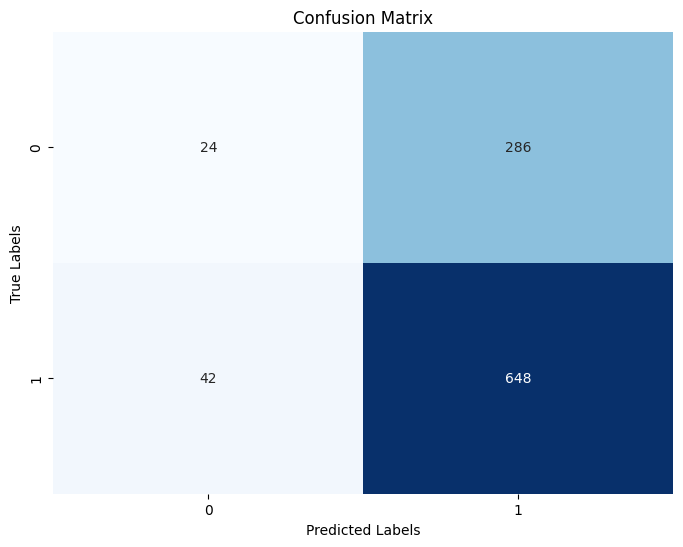

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

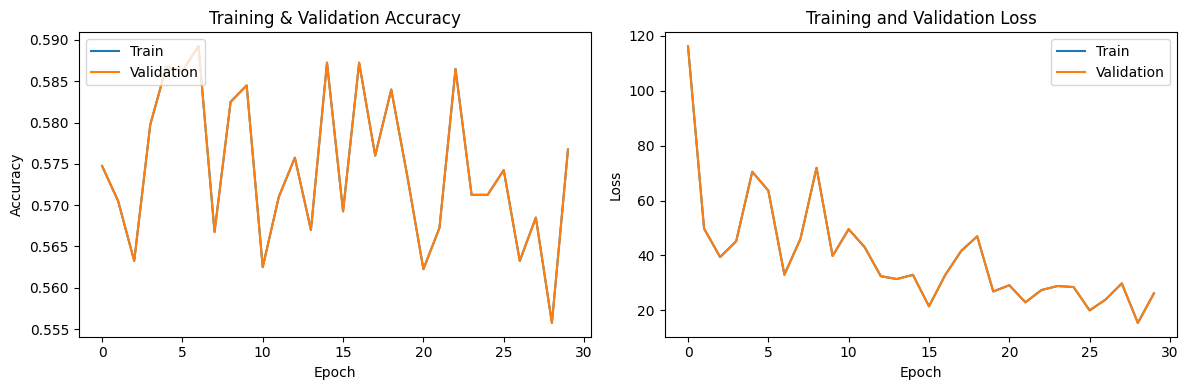

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation curves
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['accuracy'])
    plt.title('Training & Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['loss'])
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper right')

    plt.tight_layout()
    plt.show()

plot_training_history(history)

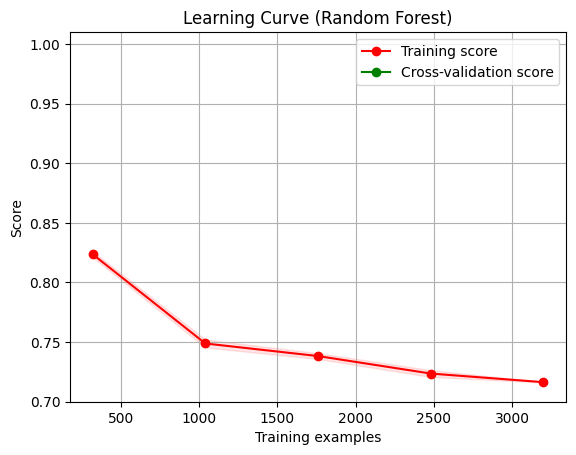

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define function to plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curve
plot_learning_curve(rf_classifier, "Learning Curve (Random Forest)", X_train, y_train, ylim=(0.7, 1.01), cv=5, n_jobs=-1)

plt.show()
